<a href="https://colab.research.google.com/github/jacobrobertsdev/MLA_JAR/blob/main/MLA1_JAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1**  
**JACOB ROBERTS**  
**CS430-ON**  
**Machine Learning in the Cloud**

##Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Connect to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read data into dataframe

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

## Print first 5 rows of data

In [5]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Print last 5 rows of data

In [6]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


## Print a sample of 5 random rows

In [7]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2141,3/30/2012 5:00,-5.1,-10.4,66,11,24.1,101.32,Clear
4425,7/3/2012 9:00,21.9,11.1,50,9,48.3,100.94,Mainly Clear
4069,6/18/2012 13:00,25.3,14.2,50,20,24.1,101.06,Mostly Cloudy
816,2/4/2012 0:00,-4.5,-6.8,84,9,2.0,102.02,Snow
1210,2/20/2012 10:00,-8.0,-13.7,64,9,48.3,102.07,Mostly Cloudy


## Print the columns

In [8]:
df.columns.tolist()

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

## Rename the columns

In [9]:
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']

## Show statistics for each column

In [10]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Create a 'temp_f' column that displays the temperature in Fahrenheit

In [11]:
df['temp_f'] = (df['temp_c'] * 9/5) + 32

In [12]:
df.head()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


## Reorder the columns so 'temp_f' appears before 'temp_c'

In [13]:
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]

In [14]:
df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


## Show data types of all columns

In [15]:
df.dtypes

,0
date_time,object
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


## Convert 'date_time' to date/time column and verify

In [16]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.dtypes

,0
date_time,datetime64[ns]
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


##Get monthly average temperature

In [19]:
monthly_avg = df.groupby(pd.Grouper(key='date_time', freq='ME'))['temp_f'].mean()
monthly_avg


,temp_f
date_time,
2012-01-31,18.731290
2012-02-29,24.395000
2012-03-31,37.618226
2012-04-30,44.616750
2012-05-31,61.227984
2012-06-30,68.241250
2012-07-31,73.022097
2012-08-31,72.102742
2012-09-30,61.672000


##Scatter Plot: Temperature & Relative Humidity

Text(0.5, 1.0, 'Temperature vs. Relative Humidity')

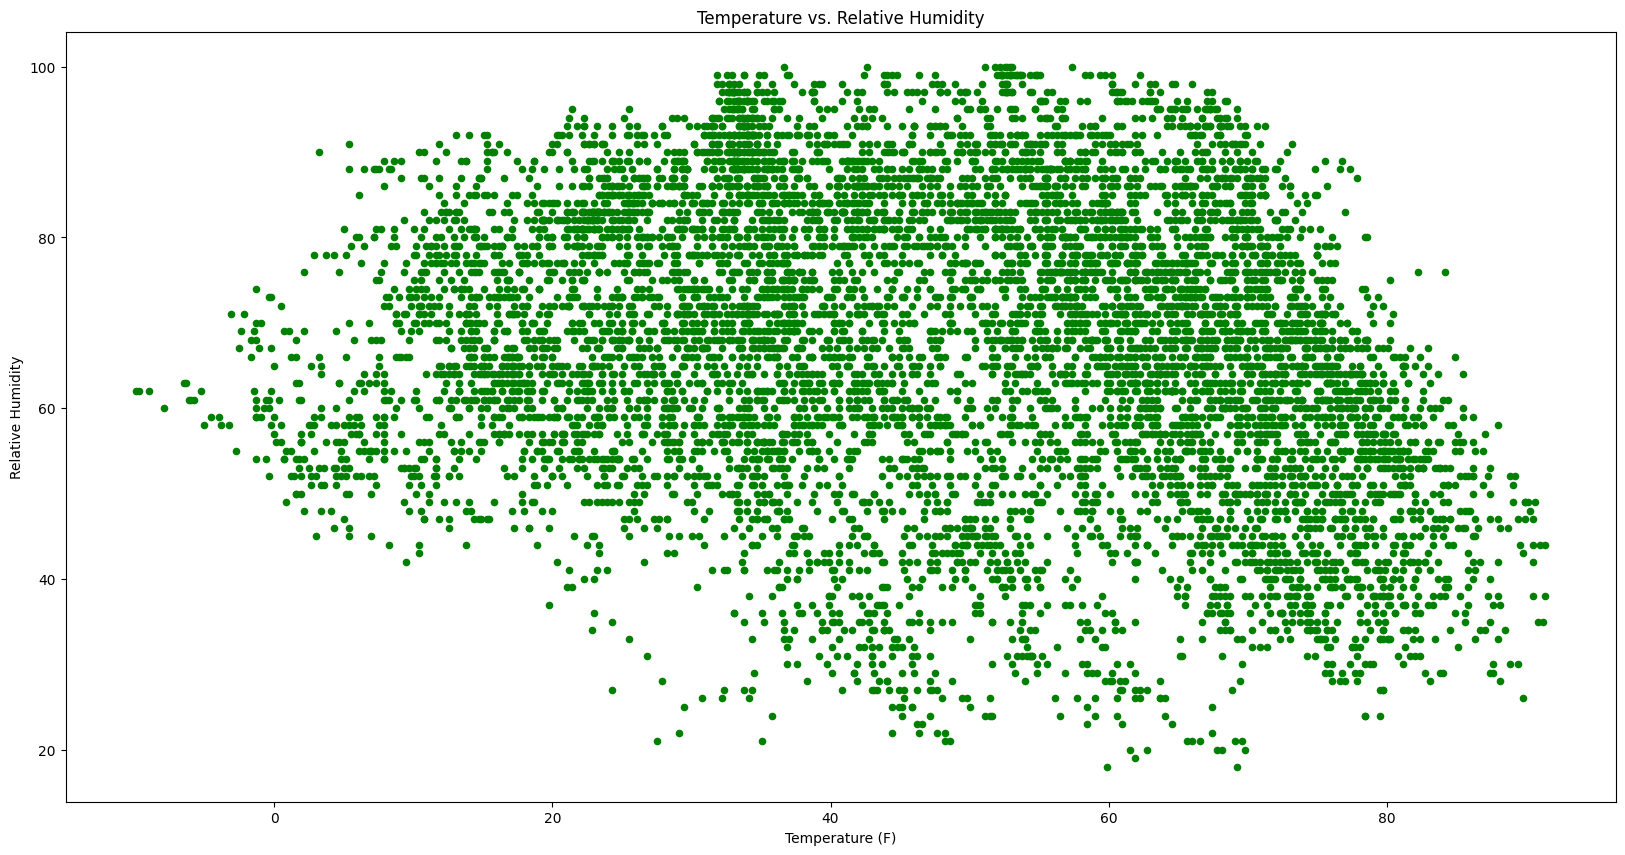

In [22]:
scatter = df.plot(kind="scatter", x="temp_f", y="relative_humidity", figsize=(20, 10), color="green")
scatter.set_xlabel("Temperature (F)")
scatter.set_ylabel("Relative Humidity")
scatter.set_title("Temperature vs. Relative Humidity")

##Line Chart: Average Temperature per month

Text(0.5, 1.0, 'Average Temperature per Month')

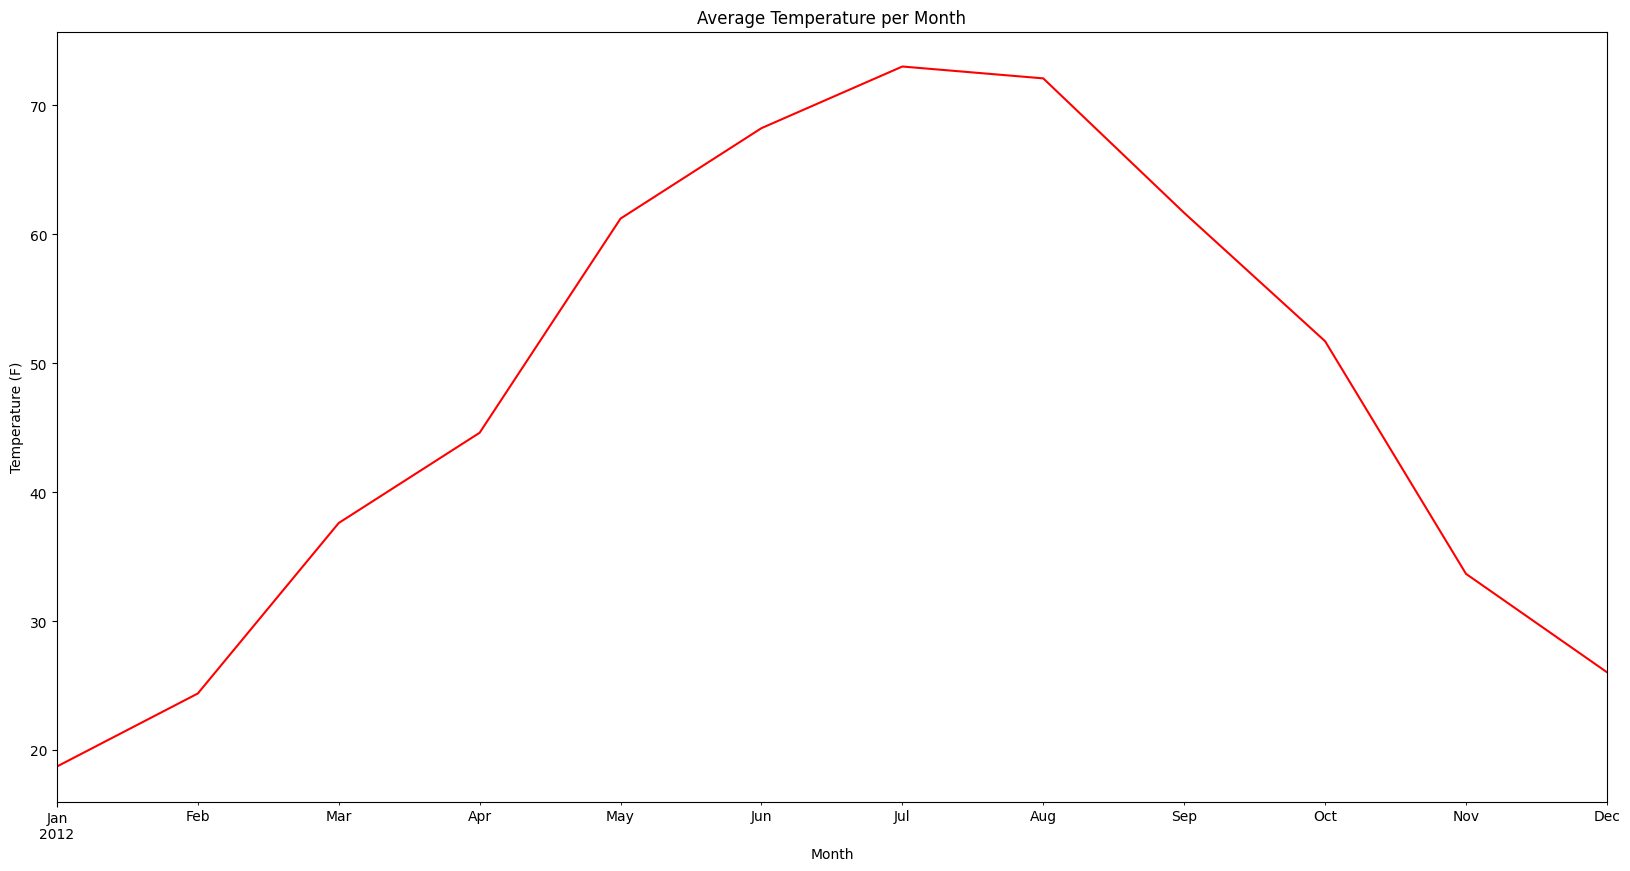

In [26]:
line = monthly_avg.plot(kind="line", color="red", figsize=(20, 10))
line.set_xlabel("Month")
line.set_ylabel("Temperature (F)")
line.set_title("Average Temperature per Month")

##Box Plot

<Axes: >

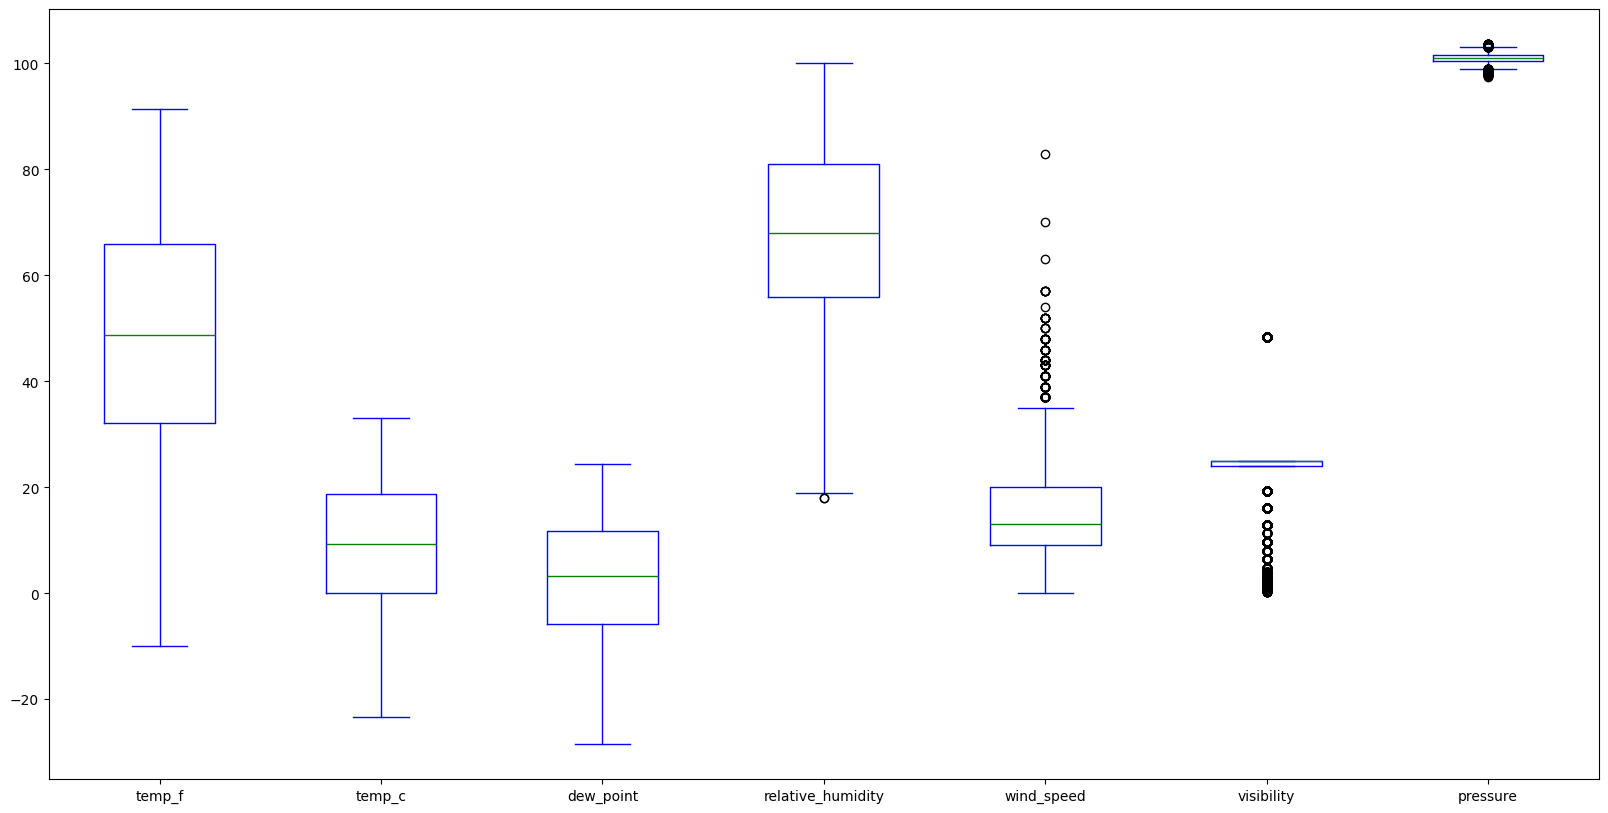

In [28]:
df.plot(kind="box", color="blue", medianprops={'color': 'green'}, figsize=(20, 10))